# Homework 18 Sept 2017

The following defines a directed cycle with ten nodes:

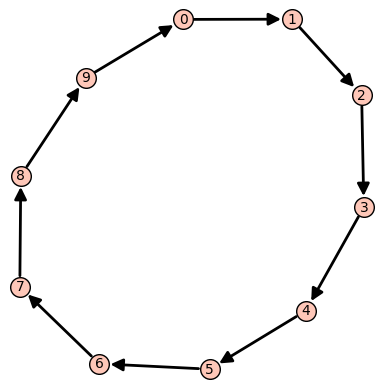

In [1]:
D1 = DiGraph([(i, (i+1)%10) for i in range(10)]); D1.show()

Define the same **directed graph** using:

1. an adjacency matrix
2. an incidence matrix
3. a boolean function

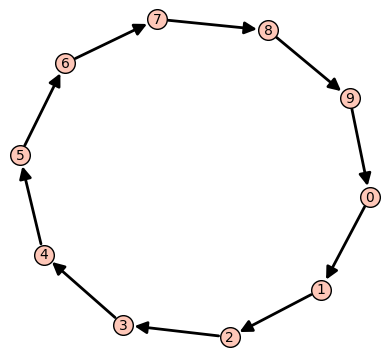

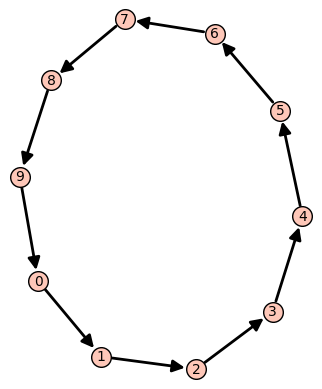

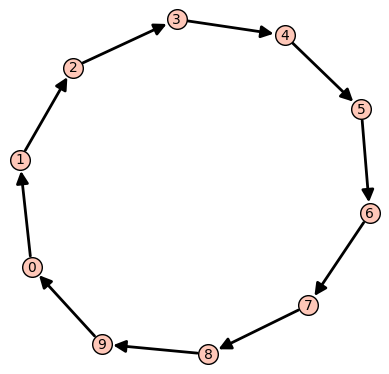

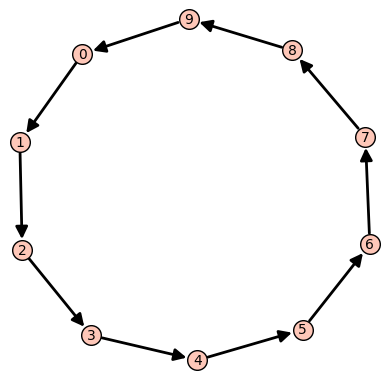

In [2]:
# Your code goes here:

# From a list of edges
D1 = DiGraph([(i, (i+1)%10) for i in range(10)])
#D1.plot(layout='circular').show()
D1.show()

# From adjacency matrix
A = Matrix(ZZ, 10, 10)
for i in range(1, 9):
    A[i, i+1] = 1
A[9, 0] = 1
A[0, 1] = 1
D2 = DiGraph(A, format='adjacency_matrix')
#D2.plot(layout='circular').show()
D2.show()

# From incidence matrix
A = Matrix(ZZ, 10, 10)
for i in range(1,10):
    A[i, i] = -1
    A[i, i-1] = 1
A[0, 0] =-1
A[0, 9] = 1
D3 = DiGraph(A, format='incidence_matrix')
#D3.plot(layout='circular').show()
D3.show()

# From Boolean function
D4 = DiGraph([range(10), lambda i,j: j-i == 1 or (i==9 and j==0)])
#D4.plot(layout='circular').show()
D4.show()

## Getting the spanning tree from a traversal

Modify the code for graph traversal below to return the resulting spanning tree, rather than just the traversal.

### Hint:
You need to maintain a pointer to where each node in ``can_visit`` "came from".

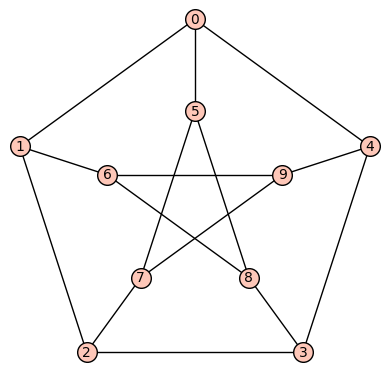

Spanning Tree:  [(0, 5), (5, 8), (8, 6), (6, 9), (5, 7), (7, 2), (8, 3), (3, 4), (2, 1)]


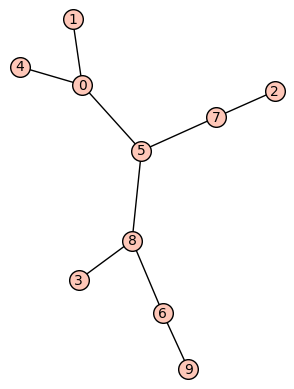

In [2]:
from collections import deque
import random
def traversal(G, root, algorithm):
    r"""
    Return a Spanning tree of ``G`` starting with root node ``r`` using DFS or BFS.
    
    ```A spanning tree of a connected graph G can also be defined as a maximal set of edges of G 
    that contains no cycle, or as a minimal set of edges that connect all vertices.(Source: Wikipedia)```
    
    INPUT:
    
    ``G`` - a graph or directed graph
    ``r`` - a node of ``G``
    ``algorithm`` - 'DFS' or 'BFS'
    """
    T = Graph()
    n = root
    traversal = [n]
    tree_dict={}
    tree_dict[n] = G.neighbors(n)
    can_visit = deque(G.neighbors(n))
    while can_visit: # this runs so long as can_visit is non-empty
        if algorithm == 'DFS':
            m = can_visit.pop()
        elif algorithm == 'BFS':
            m = can_visit.popleft()
        else:
            raise ValueError('algorithm should be DFS or BFS')
        if m in traversal:
            pass
        else:
            n = m
            traversal.append(n)
            tree_dict[n]=[v for v in G.neighbors(n) if not(v in traversal)]
            can_visit.extend([v for v in G.neighbors(n) if not(v in traversal)])
    
    
    def key_for_value(d, value):
        """Return a key in `d` having a value of `value`."""
        for k, v in d.iteritems():
            if v == value:
                return k
    
    key=[]
    spantree=[(traversal[0],traversal[1])]
    value=tree_dict.values()
    
    for k in range (2,len(traversal)):
        for i in range(len(value)):
            if traversal[k] in value[i]:
                key.append(key_for_value(tree_dict, value[i]))
        
        spantree.append((random.choice(key),traversal[k]))
        key=[]
        
    return spantree 

G = graphs.PetersenGraph();G.show()
print "Spanning Tree:  "+str(traversal(G, 0, algorithm="DFS"))
G1=Graph(traversal(G, 0, algorithm="DFS")); G1.show()